# Preliminary Sizing
### EAE 130A

The following code outlines how we performed our preliminary sizing calculations. It is derived from the preliminary sizing tutorial.

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt

Intro & Equation explanation

0.013
0.0251334215945771


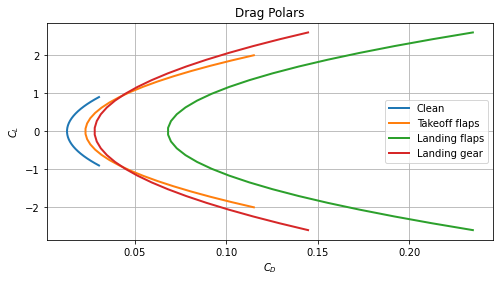

In [25]:
## Drag Polar Estimate
w_to = 57006    #lbs, takeoff weight
c_f = 0.0026    #skin friction coefficient, Raymer 12.3
c_l = 0.75       ##lift coefficient
"""
c = -0.0866     #Table 3.5 Roskam
d = 0.8099      #Table 3.5 Roskam
s_wet = (10**c)*(w_to**d)
print(s_wet)
rho = 0.0023769        #slug/ft3
c_lmax = 1.9
c_lcruise = 0.5
v_stall = 590.733*np.sqrt(c_lcruise/c_lmax)         #stall speed, ft/s
ws = 0.5*rho*(v_stall**2)*c_l #wingloading, Martins Eq 4.2  #lb/sqft
print(ws)   
s_ref = w_to/ws   #sq.ft, from tutorial
print(s_ref)  
""" 


s_ratio = 5     
c_do = c_f*(s_ratio)
print(c_do)
delta_cdo = [0, 0.010, 0.055, 0.015]
e_v = 0.80
AR = 18.44588       # aspect ratio, from openVSP model
c_d = c_do + ((c_l**2)/((np.pi)*e_v*AR))
print(c_d)
e_v = [0.80, 0.75, 0.70, 1] ## span efficiency factor, array

# Adjust C_Lmax for each flight configuration
cL_clean = np.linspace(-0.9,0.9,30)
cL_takeoff = np.linspace(-2,2,30)
cL_landing = np.linspace(-2.6,2.6,30)
clean = (c_do + delta_cdo[0]) + ((cL_clean**2)/((np.pi)*e_v[0]*AR))
takeoff = (c_do + delta_cdo[1]) + ((cL_takeoff**2)/((np.pi)*e_v[1]*AR))
landing_flaps = (c_do + delta_cdo[2]) + ((cL_landing**2)/((np.pi)*e_v[2]*AR))
landing_gear = (c_do + delta_cdo[3]) + ((cL_landing**2)/((np.pi)*e_v[3]*AR))

plt.figure(figsize=(8,4))
plt.title('Drag Polars')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.plot(clean, cL_clean, label='Clean', linestyle='-', linewidth=2)
plt.plot(takeoff, cL_takeoff, label='Takeoff flaps', linestyle='-', linewidth=2)
plt.plot(landing_flaps, cL_landing, label='Landing flaps', linestyle='-', linewidth=2)
plt.plot(landing_gear, cL_landing, label='Landing gear', linestyle='-', linewidth=2)
plt.legend(loc='best')
plt.grid()
plt.show()

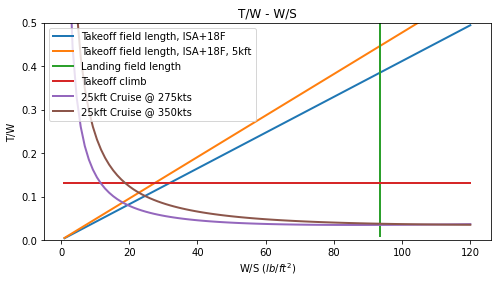

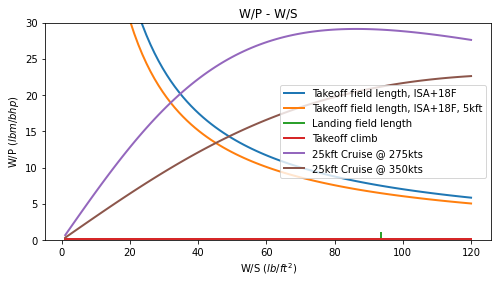

In [29]:
## Constraint Diagram
# useful definitions
N = 101
ws = np.linspace(1,120,N)
tw = np.linspace(.01,1,N)
wp = np.linspace(0.01,30,N)

## Takeoff Field Length
# Assumption: BFL = 4500 from FAR 25 TO Requirements (35 ft obstacle)
CL_max_TO = 2.1 # (Roskam)
BFL = 4500 # ft
TOP_25 = BFL/37.5
rho_SLp18F = 0.0024428 # slug/ft3, density at ISA + 18F
rho_SLp18F_5kft = 0.002107 # slug/ft3, density at ISA + 18F
rho_SL = 0.0025332 # slug/ft3, density at ISA
tw_tofl = ws/((rho_SLp18F/rho_SL)*CL_max_TO*TOP_25) 
wp_tofl = 1/(0.3467*tw_tofl)

tw_tofl_5kft = ws/((rho_SLp18F_5kft/rho_SL)*CL_max_TO*TOP_25) 
wp_tofl_5kft = 1/(0.3467*tw_tofl_5kft)

# s_land = bfl * 0.6

# rho_tot = 0.95  #given during tutorial
# c_lto = 2.1
# tw_tofl = ws/((rho_tot)*c_lto*top)

## Landing Field Length
V_a = 141*1.68780986 # ft/s approach speed, requirement
s_a = 1000*1.67 # FAR 25, Martins
s_FL = 4500 # ft, field length requirement
c_llanding = 3.3  # CL_max for landing, Roskam
# tw_landing = (((rho_tot*c_llanding)/(top*0.65))*(s_land - s_a))*np.ones(N)
# ws_landing = 

## Climb
n_engines = 2
k_s = 1.2
g = 0.012
e_v = 0.75      ##assuming takeoff configuration
c_lmax = 1.9
tw_climb = ((1/0.8)*(n_engines/(n_engines - 1))*((((k_s**2)/c_lmax)*c_do)+(c_lmax/((k_s**2)*np.pi*e_v*AR))+g))*np.ones(N)

## Cruise
# Asssumptions: 
# 25kft cruise
# constant speed prop (Gudmundsson)
eta_p_max = 0.85 # prop eff at cruise
rho_25kft = 10.66e-4 # slug/ft3, air density at cruise (25kft)
V_min = 275*1.68780986 # ft/s, 275 kts requirement
V_target = 350*1.68780986 # ft/s, 350 kts target
q_min = 0.5*rho_25kft*V_min**2 # psf, dyn pressure at cruise requirement
q_target = 0.5*rho_25kft*V_target**2 # psf, dyn pressure at cruise target
# print(q_min,q_target)
tw_cruise_min = ((q_min*c_do)/ws) + ws*(1/(q_min*(np.pi)*AR*e_v)) # tw at cruise requirement
tw_cruise_target = ((q_target*c_do)/ws) + ws*(1/(q_target*(np.pi)*AR*e_v)) # tw at cruise target 

wp_cruise_min = 1/tw_cruise_min/(V_min/(eta_p_max*550)) # wp at cruise requirement 
wp_cruise_target = 1/tw_cruise_target/(V_target/(eta_p_max*550)) # wp at cruise target


# plotting TW
plt.figure(figsize=(8,4))
plt.title('T/W - W/S')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("T/W")
plt.plot(ws, tw_tofl, label='Takeoff field length, ISA+18F', linestyle='-', linewidth=2)
plt.plot(ws, tw_tofl_5kft, label='Takeoff field length, ISA+18F, 5kft', linestyle='-', linewidth=2)
plt.plot(tw_landing, tw, label='Landing field length', linestyle='-', linewidth=2)
plt.plot(ws, tw_climb, label='Takeoff climb', linestyle='-', linewidth=2)
plt.plot(ws, tw_cruise_min, label='25kft Cruise @ 275kts', linestyle='-', linewidth=2)
plt.plot(ws, tw_cruise_target, label='25kft Cruise @ 350kts', linestyle='-', linewidth=2)
plt.ylim(0, 0.5)
plt.legend(loc='best')
# plt.show()


# plotting WP
plt.figure(figsize=(8,4))
plt.title('W/P - W/S')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P $(lbm/bhp)$")
plt.plot(ws, wp_tofl, label='Takeoff field length, ISA+18F', linestyle='-', linewidth=2)
plt.plot(ws, wp_tofl_5kft, label='Takeoff field length, ISA+18F, 5kft', linestyle='-', linewidth=2)
plt.plot(tw_landing, np.linspace(0,1,N), label='Landing field length', linestyle='-', linewidth=2)
plt.plot(ws, tw_climb, label='Takeoff climb', linestyle='-', linewidth=2)
plt.plot(ws, wp_cruise_min, label='25kft Cruise @ 275kts', linestyle='-', linewidth=2)
plt.plot(ws, wp_cruise_target, label='25kft Cruise @ 350kts', linestyle='-', linewidth=2)
plt.ylim(0, 30)
plt.legend(loc='best')
plt.show()